### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Dataset Importing

In [4]:
data=pd.read_csv("churn_prediction_simple.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

### Data Preprocessing


In [6]:
X=data.drop(columns=['churn','customer_id'])
Y=data['churn']

In [7]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_X=scaler.fit_transform(X)



In [8]:
from sklearn.model_selection import train_test_split


train_x,test_x,train_y,test_y=train_test_split(scaled_X,Y,test_size=0.2,stratify=Y,random_state=42)


train_x.shape,test_x.shape,train_y.shape,test_y.shape

((17653, 19), (4414, 19), (17653,), (4414,))

### Model Buliding & Bagging Logistic Regression


In [12]:
from sklearn.ensemble import BaggingClassifier as BC

classifier=BC()
classifier.fit(train_x,train_y)


BaggingClassifier()

In [14]:
from sklearn.linear_model import LogisticRegression as LR 

classifier=BC(base_estimator=LR(),
              n_estimators=150,
              n_jobs=-1,
              random_state=42)

classifier.fit(train_x,train_y)

predicted_values=classifier.predict(train_x)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(train_y,predicted_values))



              precision    recall  f1-score   support

           0       0.82      0.99      0.90     14234
           1       0.73      0.08      0.15      3419

    accuracy                           0.82     17653
   macro avg       0.78      0.54      0.52     17653
weighted avg       0.80      0.82      0.75     17653



In [18]:
#for testing data

predicted_values=classifier.predict(test_x)
print(classification_report(test_y,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3559
           1       0.76      0.08      0.14       855

    accuracy                           0.82      4414
   macro avg       0.79      0.54      0.52      4414
weighted avg       0.81      0.82      0.75      4414



Here it causes the underfitting by observing the f1_score from above so perform FEATURE ENGINEERING to get better prediction value and do bagging again

# RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier as RFC 

classifier = RFC()



In [20]:
classifier.fit(train_x,train_y)

RandomForestClassifier()

In [21]:
# for training data

predicted_values=classifier.predict(train_x)
print(classification_report(train_y,predicted_values))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [22]:
#for testing data

predicted_values=classifier.predict(test_x)
print(classification_report(test_y,predicted_values))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      3559
           1       0.71      0.45      0.55       855

    accuracy                           0.86      4414
   macro avg       0.79      0.70      0.73      4414
weighted avg       0.84      0.86      0.84      4414



### Hyperparameter Tuning

In [23]:
from sklearn.metrics import f1_score

def cal_score(model,x1,y1,x2,y2):
    model.fit(x1,y1)

    predict=model.predict(x1)
    f1=f1_score(y1,predict)

    predict=model.predict(x2)

    f2=f1_score(y2,predict)

    return f1,f2


In [24]:
def effect(train_Score,test_Score,x_axis,title):
    plt.figure(figsize=(5,5),dpi=100)
    plt.plot(x_axis,train_Score,color='red',label='Train Score')
    plt.plot(x_axis,test_Score,color='black',label='Test Score')
    plt.title(title)
    plt.xlabel("parameter_value")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.show()


#### Using Estimators


In [27]:
estimators=[i for i in range (1,600,10)]
train=[]
test=[]


for i in estimators:

    model=RFC(class_weight='balanced',
              n_estimators=i,
              n_jobs=-1,
              max_depth=7,
              random_state=101)
    
    f1,f2=cal_score(model,train_x,train_y,test_x,test_y)
    train.append(f1)
    test.append(f2)

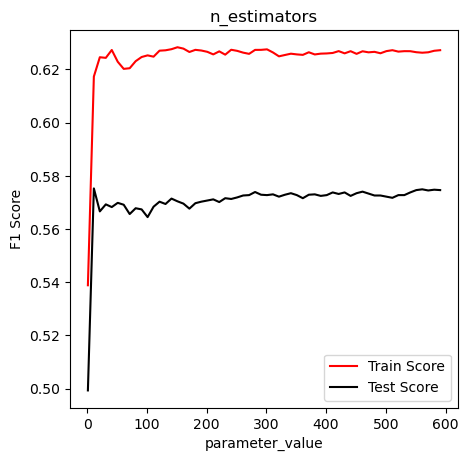

In [28]:
effect(train,test,range(1,600,10),'n_estimators')

### Max_Samples



In [31]:
maxsamples=[i/1000 for i in range(1,1000)]
train=[]
test=[]


for i in maxsamples:
    model=RFC(class_weight='balanced_subsample',
            n_estimators=50,
            n_jobs=-1,max_depth=7,
            random_state=101,max_samples=i)


    f1,f2=cal_score(model,train_x,train_y,test_x,test_y)
    train.append(f1)
    test.append(f2)

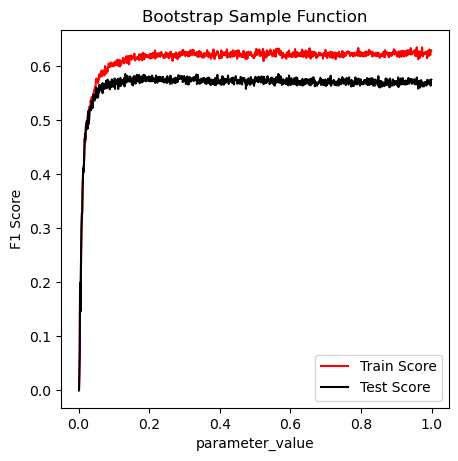

In [32]:
effect(train,test,maxsamples,'Bootstrap Sample Function')

### Max_features

In [33]:
maxfeatures=range(1,X.shape[1])

train=[]
test=[]

for i in maxfeatures:
    model=RFC(class_weight='balanced_subsample',
            n_estimators=50,
            n_jobs=-1,max_depth=7,
            random_state=101,max_features=i)
        
    f1,f2=cal_score(model,train_x,train_y,test_x,test_y)
    train.append(f1)
    test.append(f2)

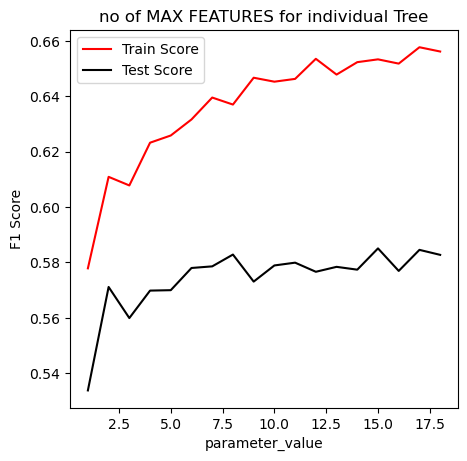

In [34]:
effect(train,test,maxfeatures,'no of MAX FEATURES for individual Tree')